# Analysis of School Avasence
# Jun Kataoka

In [1]:
!pip install sequence-mining

In [40]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

# Make pd to show all data
pd.set_option('display.max_columns', None)

In [3]:
study_data = pd.read_csv('../data/SAStudyData.csv')
study_data.dropna(axis=1, inplace=True, how="all")
study_data.drop(["Day No"], axis=1, inplace=True)
study_data.replace('.', np.nan, inplace=True)
study_data.head()
cols = list(study_data.columns)
cols[0], cols[1], cols[2], cols[3] = "Date.0", "Day.0", "Attendance.0", "Reason.0"
study_data.columns = cols
study_data.head()


,Date.0,Day.0,Attendance.0,Reason.0,Date.1,Day.1,Attendance.1,Reason.1,Date.2,Day.2,Attendance.2,Reason.2,Date.3,Day.3,Attendance.3,Reason.3,Date.4,Day.4,Attendance.4,Reason.4,Date.5,Day.5,Attendance.5,Reason.5,Date.6,Day.6,Attendance.6,Reason.6,Date.7,Day.7,Attendance.7,Reason.7,Date.8,Day.8,Attendance.8,Reason.8,Date.9,Day.9,Attendance.9,Reason.9,Date.10,Day.10,Attendance.10,Reason.10,Date.11,Day.11,Attendance.11,Reason.11,Date.12,Day.12,Attendance.12,Reason.12,Date.13,Day.13,Attendance.13,Reason.13,Date.14,Day.14,Attendance.14,Reason.14,Date.15,Day.15,Attendance.15,Reason.15,Date.16,Day.16,Attendance.16,Reason.16,Date.17,Day.17,Attendance.17,Reason.17,Date.18,Day.18,Attendance.18,Reason.18,Date.19,Day.19,Attendance.19,Reason.19
0,3/28/22,Mon,1,NaN,3/30/22,Wed,1,NaN,10/17/22,Mon,1,NaN,1/24/23,Tue,1,NaN,12/19/22,Mon,4,C,12/22/22,Thu,2,C,1/6/23,Fri,1,NaN,12/22/22,Thu,1,NaN,1/17/23,Tue,1.0,NaN,1/6/23,Fri,1.0,NaN,1/18/23,Wed,1.0,NaN,1/5/23,Thu,1.0,NaN,1/26/23,Thu,1,NaN,1/24/23,Tue,1,NaN,1/24/23,Tue,1,NaN,2/10/23,Fri,1,NaN,3/1/23,Wed,1,NaN,3/8/23,Wed,1,NaN,3/14/23,Tue,3,L,4/13/23,Thu,1.0,NaN
1,3/29/22,Tue,4,C,3/31/22,Thu,1,NaN,10/18/22,Tue,3,B,1/25/23,Wed,1,NaN,12/20/22,Tue,1,NaN,1/3/23,Tue,2,C,1/9/23,Mon,2,I,1/3/23,Tue,1,NaN,1/18/23,Wed,1.0,NaN,1/9/23,Mon,1.0,NaN,1/19/23,Thu,1.0,NaN,1/6/23,Fri,1.0,NaN,1/30/23,Mon,3,E,1/25/23,Wed,1,NaN,1/25/23,Wed,1,NaN,2/13/23,Mon,1,NaN,3/2/23,Thu,1,NaN,3/9/23,Thu,1,NaN,3/17/23,Fri,4,C,4/14/23,Fri,1.0,NaN
2,3/30/22,Wed,1,NaN,4/1/22,Fri,4,B,10/19/22,Wed,1,NaN,1/30/23,Mon,1,NaN,12/21/22,Wed,4,C,1/4/23,Wed,3,C(/L),1/10/23,Tue,1,NaN,1/4/23,Wed,1,NaN,1/19/23,Thu,3.0,A,1/10/23,Tue,1.0,NaN,1/20/23,Fri,1.0,NaN,1/9/23,Mon,1.0,NaN,1/31/23,Tue,3,B,1/26/23,Thu,1,NaN,1/26/23,Thu,1,NaN,2/14/23,Tue,4,H,3/3/23,Fri,2,I,3/10/23,Fri,1,NaN,3/20/23,Mon,4,C,4/17/23,Mon,3.0,B
3,3/31/22,Thu,1,NaN,4/4/22,Mon,1,NaN,10/20/22,Thu,1,NaN,1/31/23,Tue,3,B,12/22/22,Thu,1,NaN,1/5/23,Thu,2,C,1/11/23,Wed,1,NaN,1/5/23,Thu,1,NaN,1/20/23,Fri,1.0,NaN,1/11/23,Wed,4.0,C(/E),1/23/23,Mon,4.0,B,1/10/23,Tue,1.0,NaN,2/1/23,Wed,2,B,1/27/23,Fri,1,NaN,1/27/23,Fri,1,NaN,2/15/23,Wed,4,H,3/6/23,Mon,1,NaN,3/13/23,Mon,4,E,3/21/23,Tue,2,C,4/18/23,Tue,1.0,NaN
4,4/1/22,Fri,4,C,4/5/22,Tue,3,B,10/21/22,Fri,1,NaN,2/1/23,Wed,4,B,12/23/22,Fri,1,NaN,1/6/23,Fri,4,A then C,1/12/23,Thu,1,NaN,1/6/23,Fri,4,O,1/24/23,Tue,1.0,NaN,1/12/23,Thu,1.0,NaN,1/24/23,Tue,1.0,NaN,1/11/23,Wed,1.0,NaN,2/2/23,Thu,3,E,1/30/23,Mon,1,NaN,1/30/23,Mon,1,NaN,2/16/23,Thu,4,H,3/7/23,Tue,1,NaN,3/14/23,Tue,1,NaN,3/22/23,Wed,1,NaN,4/19/23,Wed,1.0,NaN


In [4]:
# convert data, day into datetime
study_data.head()
# Count number of indivisuals
n_ind = np.sum([1 for i in study_data.columns if "Reason" in i])
def join_df(df, n_ind, base_col_names = ["Date", "Day", "Attendance", "Reason"]):

    len_df = len(df)
    out_df = pd.DataFrame()

    for i in range(n_ind):
        col_names = [f"{col}.{i}" for col in base_col_names]
        data = df[col_names]
        data[col_names[0]] = pd.to_datetime(data[col_names[0]])
        data[col_names[1]] = data[col_names[0]].dt.day_name()
        #df[col] = df[col].fillna(-1)
#df[col] = df[col].astype(int)
#df[col] = df[col].astype(str)
#df[col] = df[col].replace('-1', np.nan) 
        data[col_names[2]] = data[col_names[2]].fillna(-1)
        data[col_names[2]] = data[col_names[2]].astype("int")
        data[col_names[2]] = data[col_names[2]].replace(-1, np.nan)
        data[col_names[3]] = data[col_names[3]].astype("object")
        data["Person ID"] = np.repeat(i, len(data))
        data.columns = base_col_names + ["Person ID"]
        out_df = pd.concat([out_df, data], axis=0)
    return out_df

merged_df = join_df(study_data, n_ind)

/tmp/ipykernel_487/906158690.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[col_names[0]] = pd.to_datetime(data[col_names[0]])
/tmp/ipykernel_487/906158690.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col_names[0]] = pd.to_datetime(data[col_names[0]])
/tmp/ipykernel_487/906158690.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col_names

In [5]:
max_person_id = merged_df["Person ID"].max()
out = []

columns = [1, 2, 3, 4]
for i in range(max_person_id+1):
    test = merged_df[merged_df["Person ID"] == i]["Attendance"].dropna().astype("int").values.tolist()
    matrix = pd.crosstab(
    pd.Series(test[:-1], name='from'),
    pd.Series(test[1:], name='to'),
    normalize=0
    )
    for c in columns:
        if c not in matrix.columns:
            matrix.loc[:, c] = 0.00
            matrix.sort_index(axis=1, inplace=True)
        if c not in matrix.index:
            matrix.loc[c, :] = 0.00
            matrix.sort_index(axis=0, inplace=True)
    out.append(matrix)
out[0]

to,1,2,3,4
from,,,,
1,0.806452,0.032258,0.0,0.161290
2,0.500000,0.500000,0.0,0.000000
3,0.000000,0.000000,0.0,0.000000
4,0.666667,0.000000,0.0,0.333333


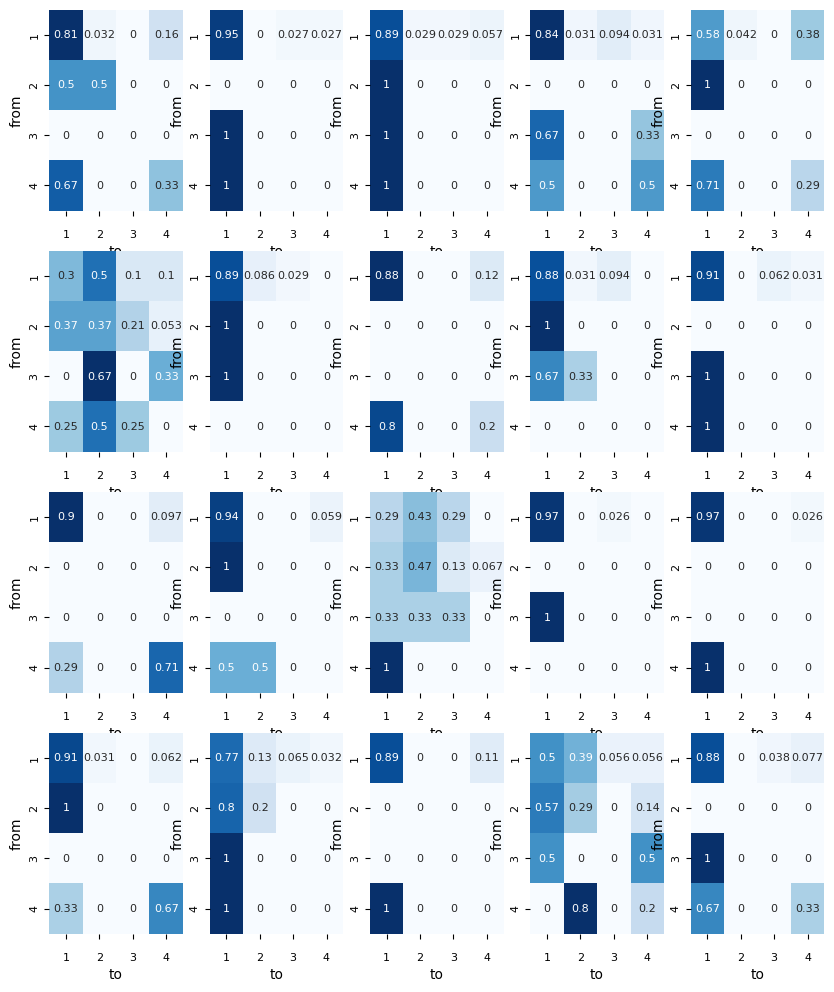

In [6]:
# visualize all matrixces as heatmap using subplots
fig, ax = plt.subplots(figsize=(10, 12), nrows=4, ncols=5)

for i in range(4):
    for j in range(5):
        sns.heatmap(out[i*5+j], cmap="Blues", annot=True, ax=ax[i, j], cbar=False, annot_kws={"fontsize":8})
        ax[i, j].set_xticklabels(ax[i, j].get_xticklabels(), fontsize=8)
        ax[i, j].set_yticklabels(ax[i, j].get_yticklabels(), fontsize=8)
        # Increase x label margin
        ax[i, j].tick_params(axis='x', which='major', pad=10)

#for i in range(1, max_person_id+1):
#    plt.figure(figsize=(4, 4))
#    sns.heatmap(out[i-1], cmap="Blues", annot=True)
#    plt.title(f"Person {i}")
#    plt.show()


In [7]:
student_similarity = np.zeros((len(out), len(out)))
for i in range(len(out)):
    for j in range(len(out)):
        student_similarity[i, j] = 1 - np.mean([np.linalg.norm(out[i].loc[k, :] - out[j].loc[k, :]) for k in out[i].index])

In [8]:
student_similarity = pd.DataFrame(np.tril(student_similarity))
np.round(student_similarity, 2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
1,0.41,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
2,0.42,0.73,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
3,0.54,0.67,0.43,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
4,0.73,0.27,0.54,0.38,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
5,0.37,0.11,0.07,0.25,0.27,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
6,0.34,0.47,0.73,0.43,0.44,0.16,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
7,0.75,0.65,0.41,0.67,0.62,0.28,0.26,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
8,0.40,0.36,0.61,0.44,0.50,0.26,0.86,0.32,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
9,0.41,0.99,0.74,0.69,0.28,0.12,0.48,0.65,0.37,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0


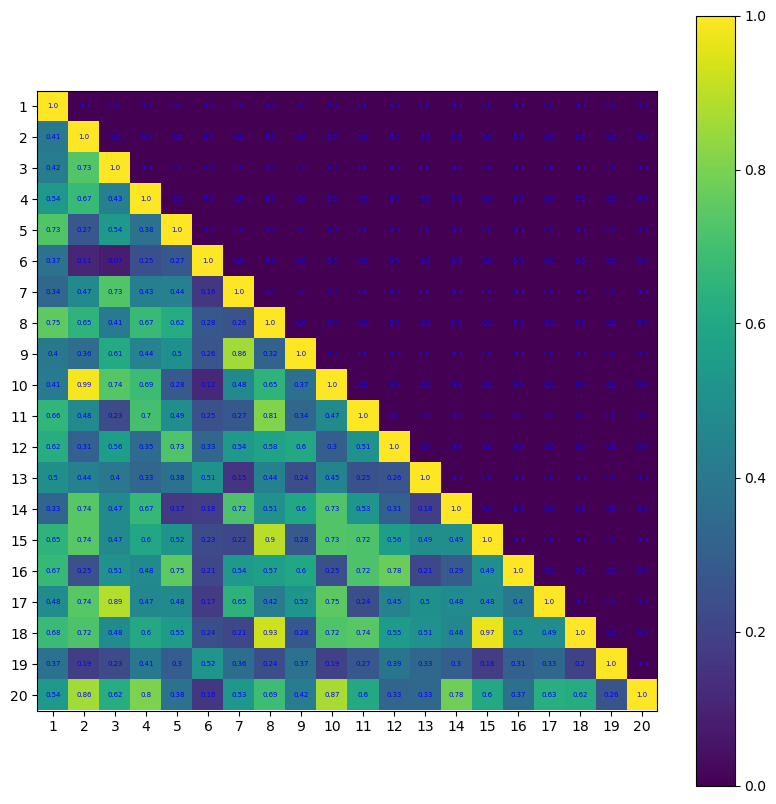

In [9]:
# vissualize the similarity and plot the values as text on the heatmap

plt.figure(figsize=(10, 10))
plt.imshow(np.tril(student_similarity))
# set x tick step size
plt.xticks(np.arange(0, len(student_similarity), 1))
# set y tick step size
plt.yticks(np.arange(0, len(student_similarity), 1))
# set x tick labels
plt.gca().set_xticklabels(np.arange(1, len(student_similarity)+1, 1))
# set y tick labels
plt.gca().set_yticklabels(np.arange(1, len(student_similarity)+1, 1))

plt.colorbar()
# add text to heatmap
for i in range(len(student_similarity)):
    for j in range(len(student_similarity)):
        plt.text(j, i, np.round(student_similarity.loc[i, j], 2), ha="center", va="center", color="b", fontsize=5)

In [32]:
# implement tree-based clustering
input_table = pd.DataFrame()
for i in range(len(out)):
    temp = pd.Series(out[i].to_numpy().reshape(-1))
    input_table = pd.concat([input_table, temp], axis=1)
input_table = input_table.T
input_table.columns = [f"feature_{i}" for i in range(input_table.shape[1])]
input_table.index = [f"student_{i}" for i in range(input_table.shape[0])]
input_table

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15
student_0,0.806452,0.032258,0.000000,0.161290,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.0,0.00,0.333333
student_1,0.945946,0.000000,0.027027,0.027027,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.00,0.000000
student_2,0.885714,0.028571,0.028571,0.057143,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.00,0.000000
student_3,0.843750,0.031250,0.093750,0.031250,0.000000,0.000000,0.000000,0.000000,0.666667,0.000000,0.000000,0.333333,0.500000,0.0,0.00,0.500000
student_4,0.583333,0.041667,0.000000,0.375000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.714286,0.0,0.00,0.285714
student_5,0.300000,0.500000,0.100000,0.100000,0.368421,0.368421,0.210526,0.052632,0.000000,0.666667,0.000000,0.333333,0.250000,0.5,0.25,0.000000
student_6,0.885714,0.085714,0.028571,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000
student_7,0.882353,0.000000,0.000000,0.117647,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000,0.0,0.00,0.200000
student_8,0.875000,0.031250,0.093750,0.000000,1.000000,0.000000,0.000000,0.000000,0.666667,0.333333,0.000000,0.000000,0.000000,0.0,0.00,0.000000
student_9,0.906250,0.000000,0.062500,0.031250,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.00,0.000000


In [41]:
complete_clustering = linkage(input_table, method="complete", metric="euclidean")
average_clustering = linkage(input_table, method="average", metric="euclidean")
single_clustering = linkage(input_table, method="single", metric="euclidean")

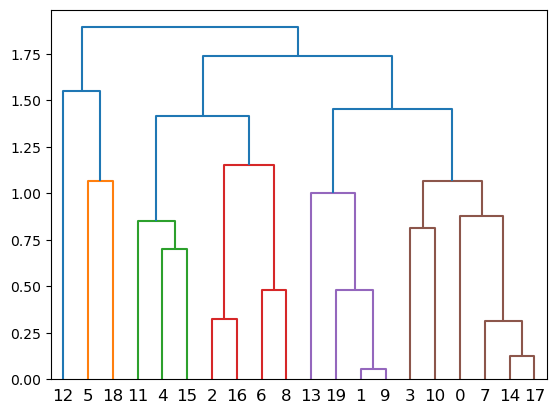

In [42]:
dendrogram(complete_clustering)
plt.show()

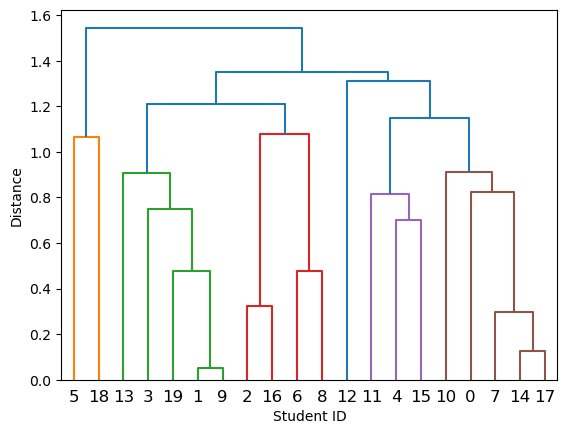

In [47]:
dendrogram(average_clustering)
# Add x axis label
plt.xlabel("Student ID")
plt.ylabel("Distance")
plt.show()

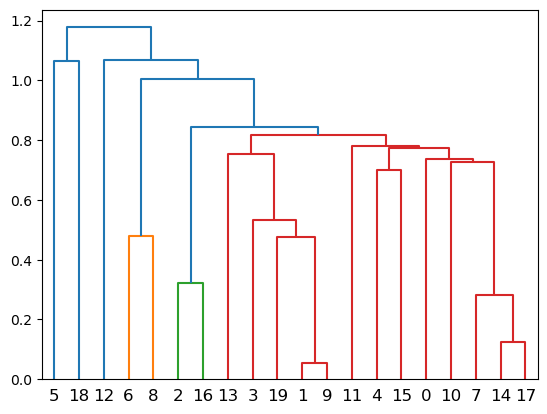

In [45]:
dendrogram(single_clustering)
plt.show()